In [15]:
print("OK")

OK


![WhatsApp Image 2025-12-04 at 09.18.34_d37e35e8.jpg](<attachment:WhatsApp Image 2025-12-04 at 09.18.34_d37e35e8.jpg>)
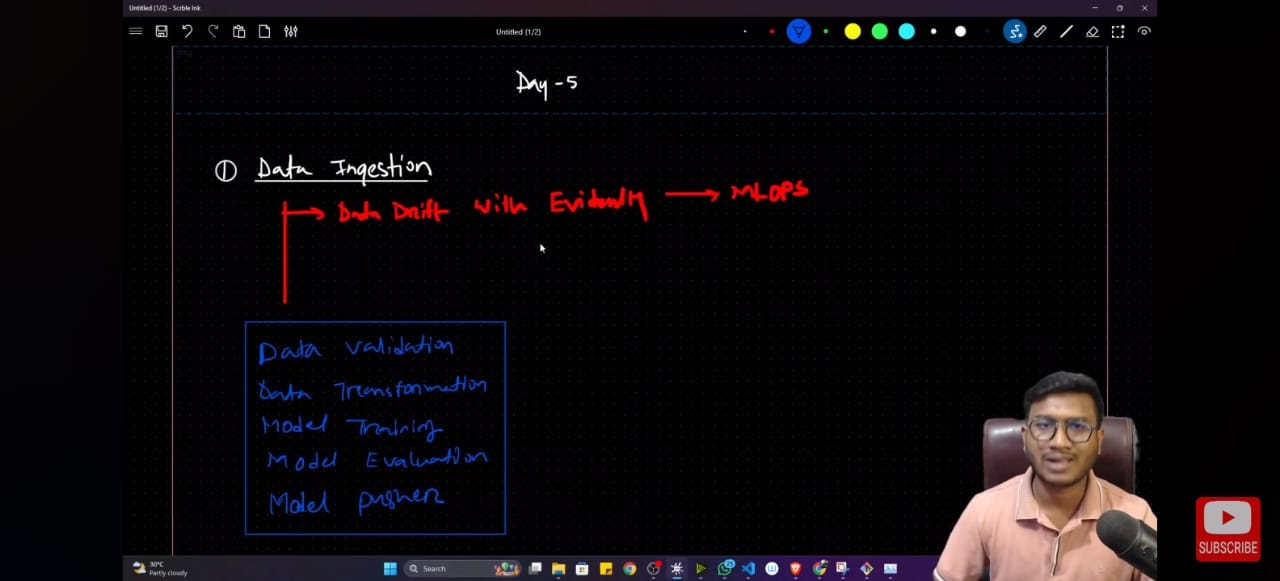

# Pipeline, it runs in order automatically
# Entities

1) Data ingestion (first component)
2) Data validation
3) Data transformation
4) Model training
5) Model evaluation
6) Model pusher   


Data Ingestion: Responsible only for getting and splitting data  
Data Validation: Validates both train and test sets independently  
Data Transformation: Transforms both sets using the same preprocessing pipeline  
Model Training: Focuses only on model training, not data preparation  

# Why data validation required?

#### Validation in machine learning is done to ensure the data you are sending into your pipeline is correct, consistent, and safe for the model to learn from. If your input data has missing columns, unexpected categories, wrong data types, or a completely different distribution compared to the data the model was originally trained on, the model will fail or produce incorrect predictions. Validation acts like a quality check before the data enters the next stage. It verifies that all required columns exist, the numerical and categorical fields are present, the schema matches the expected structure, and the data distribution has not drifted significantly. If any of these checks fail, the pipeline stops and raises an error instead of training a bad model. This prevents silent errors, avoids wasted computation, protects model accuracy, and ensures that only clean and compatible data moves forward in the ML pipeline.

# Data Validation Tool

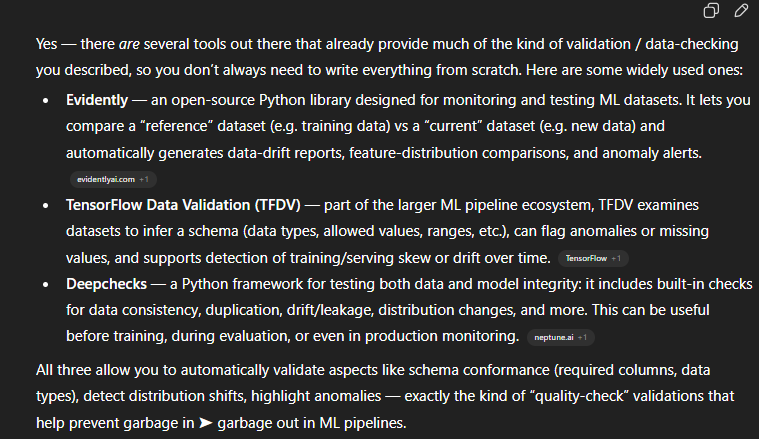

# Data Drift meaning? 
Data drift means your new incoming data has changed in its pattern, distribution, or behavior compared to the data your model was originally trained on.  

Because machine learning models learn patterns from the training data, any major change in the type of data they receive later will confuse the model and reduce accuracy.  

Data drift = the statistical properties of input data change over time, causing the model to perform poorly because it is seeing unfamiliar data.

#### Why initially split the data

Evidently drift detection needs both datasets as separate entities  
Schema validation on both train and test independently  
Early detection of data quality issues before expensive training  

#### If you split during model training:  

Data validation can't detect train-test drift  
Different random splits if pipeline re-runs  
Preprocessing might cause data leakage  
Harder to debug data issues  
Less modular architecture  

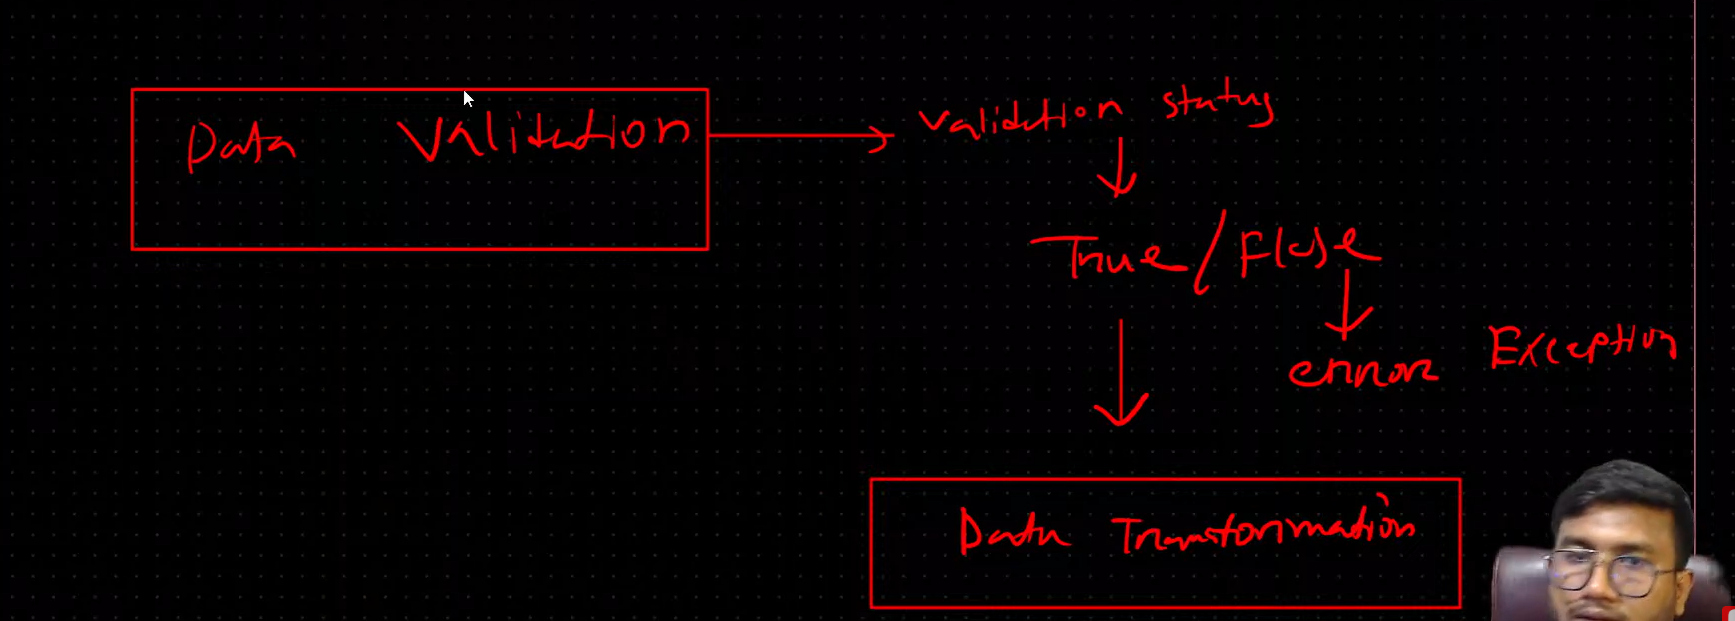

### In the context of your MLOps project, "data ingestion" typically refers to the process of loading and preparing raw data for the machine learning pipeline, rather than specifically ingesting data into a database.

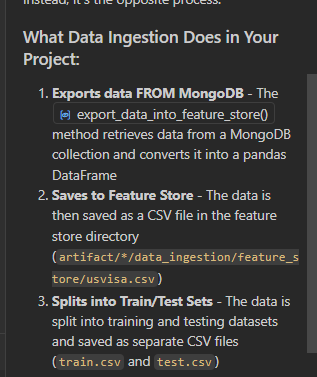

MongoDB → DataFrame → CSV (Feature Store) → Train/Test Split → CSV Files   

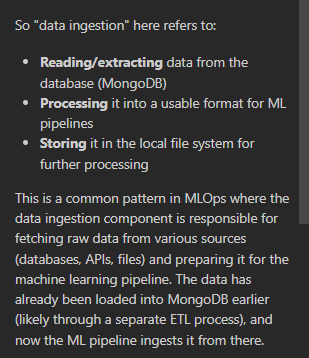

https://www.youtube.com/live/tqu9FqGY3q4?si=X69Br7BeOvSUTc4E

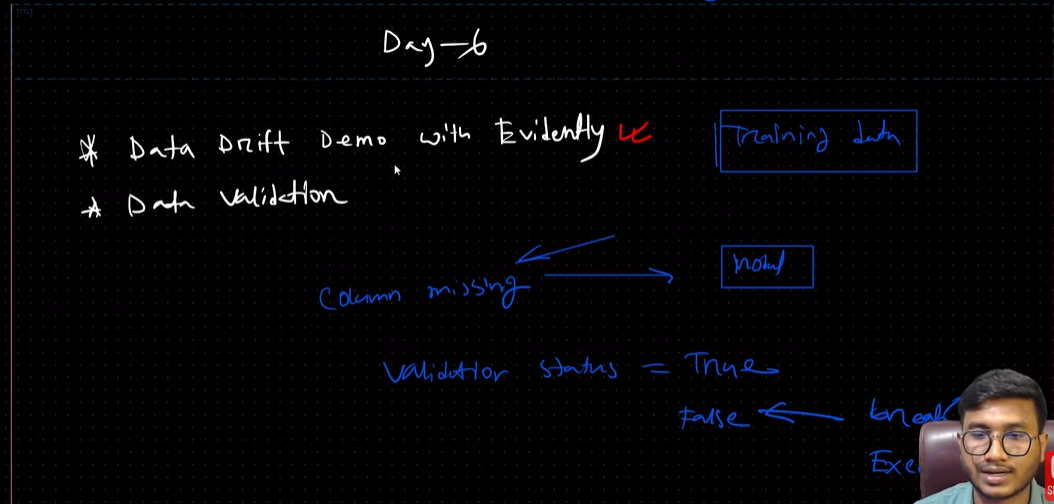

# The K-S test is likely the Kolmogorov-Smirnov test, a non-parametric test used to assess whether two distributions are different   

#### trainin and testing data should follow same distribution



#### What data transformation means  

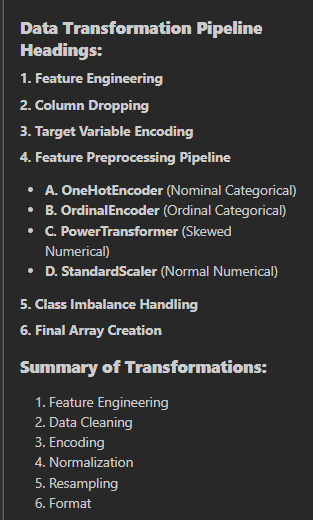

#### EDA is performed on the entire dataset
#### Feature engineering is performed after splitting the data.

#### artifact folder is the storing folder to store the generated output of the code   

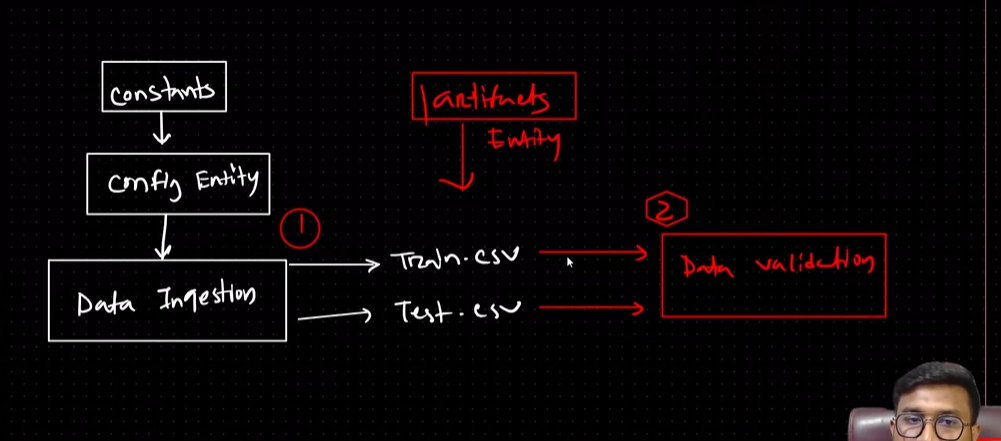   


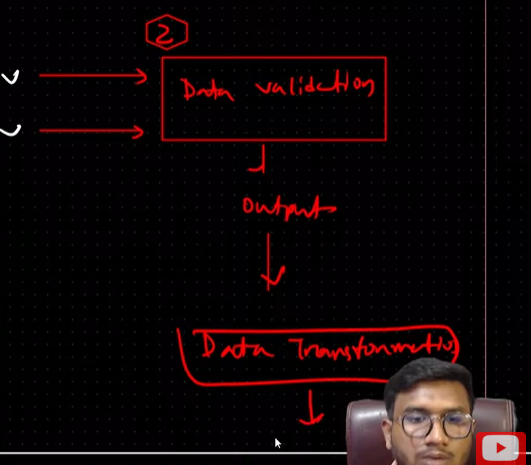  

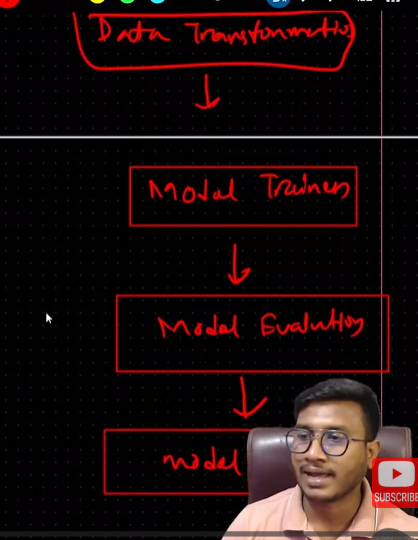

#### We dont need constructor inside class anymore because TrainingPipelineConfig is a dataclass now not a python class
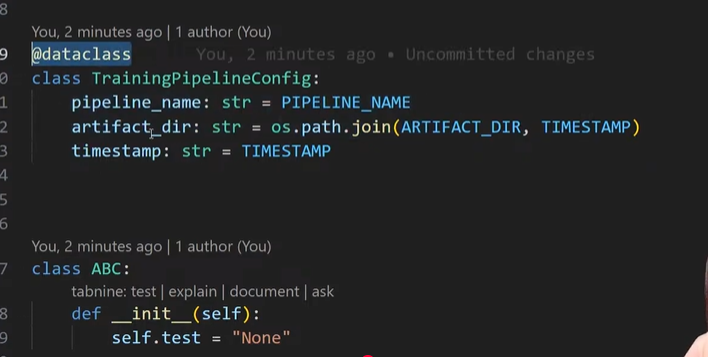

In [16]:
import pandas as pd
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, CatTargetDriftTab
from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

## Load out Boston data

In [17]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston_frame = pd.read_csv(data_url)

In [18]:
boston_frame.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
boston_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# Data Drift Dashboard

In [20]:
boston_frame.shape

(506, 14)

In [21]:
boston_frame[:200]  #train/ reference data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0,0.404,7.107,36.6,7.3090,2,329,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6


In [22]:
boston_frame[200:] #test data 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.5730,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.5730,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.5730,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.5730,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [23]:
boston_data_drift_dashboard = Dashboard(tabs=[DataDriftTab()])

In [24]:
boston_data_drift_dashboard.calculate(boston_frame[:200], boston_frame[200:])

In [25]:
boston_data_drift_dashboard.show()

#### reference DISTRIBUTION = Train data
#### current Distribution = test data

In [26]:
boston_data_drift_dashboard.save("boston_data_drift_report.html")

In [27]:
boston_data_drift_profile = Profile(sections=[DataDriftProfileSection()])

In [28]:
boston_data_drift_profile.calculate(boston_frame[:200], boston_frame[200:])

In [29]:
boston_data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2025-12-04 14:42:44.994551", "data": {"utility_columns": {"date": null, "id": null, "target": null, "prediction": null}, "num_feature_names": ["age", "b", "chas", "crim", "dis", "indus", "lstat", "medv", "nox", "ptratio", "rad", "rm", "tax", "zn"], "cat_feature_names": [], "text_feature_names": [], "datetime_feature_names": [], "target_names": null, "options": {"confidence": null, "drift_share": 0.5, "nbinsx": 10, "xbins": null}, "metrics": {"n_features": 14, "n_drifted_features": 11, "share_drifted_features": 0.7857142857142857, "dataset_drift": true, "age": {"current_small_hist": {"x": [6.8, 16.12, 25.44, 34.76, 44.08, 53.4, 62.72, 72.04, 81.36, 90.67999999999999, 100.0], "y": [0.0035064097169626076, 0.007012819433925215, 0.008766024292406523, 0.007363460405621476, 0.007714101377317736, 0.006311537490532693, 0.00736346040562147, 0.010168588179191569, 0.014726920811242964, 0.03436281522623352]}, "ref_small_hist": {"x": [2.9, 12.61, 2